<a href="https://colab.research.google.com/github/Permanganant/Music-Genre-Classification/blob/main/Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 4.1MB/s 


In [ ]:
!pip install git+git://github.com/keplr-io/quiver.git

In [ ]:
!pip install tensorflow==2.4.0

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy
from IPython.display import Audio
# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pathlib
import shutil
import tempfile

In [ ]:

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [ ]:
!pip install -U scipy==1.2.0

In [ ]:
from scipy.misc import imsave

In [ ]:
import os
general_path = '/content/gdrive/MyDrive/Kaggle/Data'
genres = list(os.listdir(f'{general_path}/genres_original'))
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00017.wav')
sr

22050

In [ ]:
an_image = PIL.Image.open(general_path+'%s' song)

In [ ]:
each_song_size = 66179
songs = np.empty(10) 
j = 0
y[0:66179]

array([-0.01455688, -0.06048584, -0.02310181, ..., -0.42648315,
       -0.49816895, -0.3609619 ], dtype=float32)

In [ ]:
for z in genres:
  k = 0
  genre = z
  audio = list(os.listdir(f'{general_path}/genres_original/%s' %genre))
  counter = 0
  if genre == 'jazz':
    k = 2
  for song in range(100 - k):
    path  = genre +'/'+ audio[song]
    y, sr = librosa.load(f'{general_path}/genres_original/%s' %path)
    j = 0
    for i in range(10):
      data_s = np.array(y[j:66179*(i+1)])
      #print(data_s.size)
      scipy.io.wavfile.write('/content/gdrive/MyDrive/Machine Learning EHB 328E/New_data_set/%s/%s' %(genre,counter), sr, data_s)
      j = j + 66179
      counter = counter + 1
  

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label, img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

In [ ]:
S_DB.shape

(128, 130)

In [ ]:
song_path_mel = '/content/gdrive/MyDrive/Machine Learning EHB 328E/New_Mels'
song_path = '/content/gdrive/MyDrive/Machine Learning EHB 328E/New_data_set'
for z in genres:
  k = 0
  genre = z
  audio = list(os.listdir(f'{song_path}/%s' %genre))
  if genre == 'jazz':
      k = 2
  for song in range(100 - k):
      path  = genre +'/'+ audio[song]
      y, sr = librosa.load(f'{song_path}/%s' %path)
      S = librosa.feature.melspectrogram(y, sr=sr)
      S_DB = librosa.amplitude_to_db(S, ref=np.max) 
      plt.imsave(f'{song_path_mel}/%s/%s.png' %(genre,song),S_DB) 

In [ ]:
batch_size = 32
img_height = 128
img_width = 130

In [ ]:
song_path_mel = '/content/gdrive/MyDrive/Machine Learning EHB 328E/New_Mels'
data_dir = song_path_mel

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 998 files belonging to 10 classes.
Using 799 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 998 files belonging to 10 classes.
Using 199 files for validation.


In [ ]:
path = '/content/gdrive/MyDrive/spektrogram/'

In [ ]:
sTrain = np.load(path+'sTrain.npy')
sTest  = np.load(path+'sTest.npy')
sDev   = np.load(path+'sDev.npy')

yTrain  = np.load(path+'yTrain.npy')
yTest   = np.load(path+'yTest.npy')
yDev    = np.load(path+'yDev.npy')

In [ ]:
sTrain = np.concatenate((sTrain,sDev),axis=0)
yTrain = np.concatenate((yTrain,yDev),axis=0)

In [ ]:
len(sTrain)

7990

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
STEPS_PER_EPOCH = 7990//batch_size

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
def compile_and_fit(model, name, optimizer=None, max_epochs=100):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(
  optimizer=optimizer,
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

  #model.summary()

  history = model.fit(
  sTrain,yTrain,
  validation_data=(sTest,yTest),
  epochs=max_epochs)
  return history

In [ ]:
num_classes = 10

tiny_model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 258, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

In [ ]:
size_histories = {}
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Epoch 1/100
250/250 [==============================] - 4s 12ms/step - loss: 2.2972 - accuracy: 0.1113 - val_loss: 2.2076 - val_accuracy: 0.2040
Epoch 2/100
250/250 [==============================] - 3s 11ms/step - loss: 2.1704 - accuracy: 0.1891 - val_loss: 1.9384 - val_accuracy: 0.2930
Epoch 3/100
250/250 [==============================] - 3s 11ms/step - loss: 2.0399 - accuracy: 0.2220 - val_loss: 1.8877 - val_accuracy: 0.3100
Epoch 4/100
250/250 [==============================] - 3s 11ms/step - loss: 1.9803 - accuracy: 0.2382 - val_loss: 1.8106 - val_accuracy: 0.3780
Epoch 5/100
250/250 [==============================] - 3s 11ms/step - loss: 1.9410 - accuracy: 0.2576 - val_loss: 1.7855 - val_accuracy: 0.4100
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 1.9187 - accuracy: 0.2687 - val_loss: 1.7187 - val_accuracy: 0.3970
Epoch 7/100
250/250 [==============================] - 3s 10ms/step - loss: 1.9067 - accuracy: 0.2723 - val_loss: 1.7139 - val_accuracy:

In [ ]:
tiny_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 78, 256, 32)       320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 128, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 126, 32)       9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 30, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 28, 32)        

NoneType

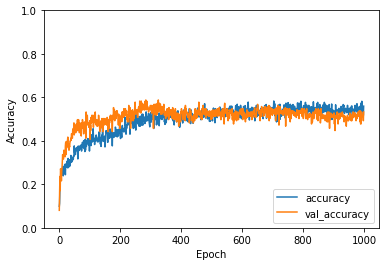

In [ ]:
history = size_histories['Tiny']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#plt.savefig('/content/gdrive/MyDrive/Machine Learning EHB 328E/Model_figures/tiny3')

In [ ]:
tiny_model.save(filepath="/content/gdrive/MyDrive/Machine Learning EHB 328E/Models/tiny3",save_format="tf")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Machine Learning EHB 328E/Models/tiny3/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Machine Learning EHB 328E/Models/tiny3/assets


In [ ]:
saved_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Machine Learning EHB 328E/Models/tiny3')
#saved_model.summary()

In [ ]:
from quiver_engine import server

In [ ]:
server.launch(saved_model)

In [ ]:
probability_model = tf.keras.Sequential([saved_model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
def predict_genre(model):
  test_label = [0,1,2,3,4,5,6,7,9]
  hop_length = 512

  probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
  song_name = input("Enter song name:") 
  y, sr = librosa.load('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/%s.wav' %song_name)
  S = librosa.feature.melspectrogram(y, sr=sr)
  test_sound1 = librosa.amplitude_to_db(S, ref=np.max)/255
  plt.figure(figsize = (16, 6))
  #librosa.display.specshow(test_sound1, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log');
  #plt.colorbar();
  #plt.title("Test Spectrogram", fontsize = 23,color = 'r');
  plt.imsave('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/images/%s.png' %song_name,test_sound1)


  
  test_dir = ('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/images/%s.png' %song_name)
  from skimage import io
  img = io.imread(test_dir)
  img_test = img
  #io.imshow(img)

  img = img.reshape(-1,128,130,4)
  img = np.float32(img)[:,:,:,:3]
  img = tf.convert_to_tensor(img, dtype=None, dtype_hint=None, name=None)
  predictions = probability_model.predict(img)

  #data = ('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/%s.wav' %song_name)
  #Audio(data,rate=22050)

  test_label = input("Enter sound genre that you upload:")
  test_label = genres.index(test_label)

  plot_value_array(1, predictions[0], test_label)
  _ = plt.xticks(range(10), genres, rotation=45)

Enter song name:song28
Enter sound genre that you upload:classical


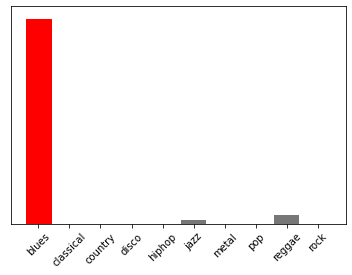

In [ ]:
predict_genre(saved_model)

In [ ]:
sosn_fft = 2048 # FFT window size
hop_length = 512

In [ ]:
song_name = input("Enter song name:") 

Enter song name:song14


In [ ]:
y, sr = librosa.load('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/%s.wav' %song_name)
S = librosa.feature.melspectrogram(y, sr=sr)
test_sound1 = librosa.amplitude_to_db(S, ref=np.max)/255
plt.figure(figsize = (16, 6))
librosa.display.specshow(test_sound1, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log');
plt.colorbar();
plt.title("Test Spectrogram", fontsize = 23,color = 'r');
plt.imsave('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/images/%s.png' %song_name,test_sound1)


In [ ]:
test_dir = ('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/images/%s.png' %song_name)

In [ ]:
from skimage import io
img = io.imread(test_dir)
img_test = img
io.imshow(img)

In [ ]:
img = img.reshape(-1,128,130,4)

In [ ]:
img.shape

(1, 128, 130, 4)

In [ ]:
img = np.float32(img)[:,:,:,:3]

In [ ]:
img = tf.convert_to_tensor(
    img, dtype=None, dtype_hint=None, name=None
)

In [ ]:
 img.shape

TensorShape([1, 128, 130, 3])

In [ ]:
predictions = probability_model.predict(img)
predictions

array([[1.2309655e-03, 9.8078865e-01, 8.6864801e-03, 3.8807478e-03,
        2.0849668e-04, 4.0175527e-04, 4.8604785e-04, 3.0520647e-03,
        1.2326394e-03, 3.2054602e-05]], dtype=float32)

In [ ]:

test_label = [0,1,2,3,4,5,6,7,9]

In [ ]:
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
data = ('/content/gdrive/MyDrive/Machine Learning EHB 328E/sound_tests/%s.wav' %song_name)
Audio(data,rate=22050)

In [ ]:
test_label = input("Enter sound genre that you upload:")
test_label = genres.index(test_label)

Enter sound genre that you upload:pop


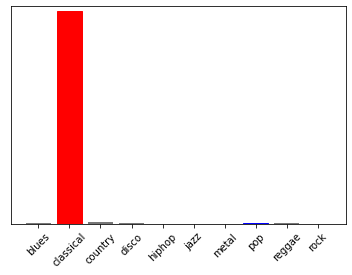

In [ ]:
plot_value_array(1, predictions[0], test_label)
_ = plt.xticks(range(10), genres, rotation=45)

In [ ]:
dropout_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
size_histories['Dropout'] = compile_and_fit(tiny_model, 'sizes/Dropout')

Epoch 1/10
25/25 [==============================] - 3s 80ms/step - loss: 0.0300 - accuracy: 0.9894 - val_loss: 1.5829 - val_accuracy: 0.6281
Epoch 2/10
25/25 [==============================] - 2s 74ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 1.5810 - val_accuracy: 0.6181
Epoch 3/10
25/25 [==============================] - 2s 74ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 1.7202 - val_accuracy: 0.6734
Epoch 4/10
25/25 [==============================] - 2s 78ms/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 1.5250 - val_accuracy: 0.6834
Epoch 5/10
25/25 [==============================] - 2s 78ms/step - loss: 0.0293 - accuracy: 0.9942 - val_loss: 1.5994 - val_accuracy: 0.6884
Epoch 6/10
25/25 [==============================] - 2s 78ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.4626 - val_accuracy: 0.7035
Epoch 7/10
25/25 [==============================] - 2s 78ms/step - loss: 6.0127e-04 - accuracy: 1.0000 - val_loss: 1.5316 - val_accuracy: 0.7286
Epoch 8/1

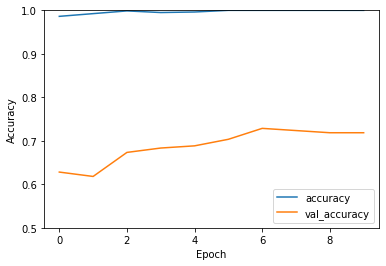

In [ ]:
history = size_histories['Dropout']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
DR_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.3),
  layers.Dense(num_classes)
])

In [ ]:
size_histories['DR'] = compile_and_fit(tiny_model, 'DR/Dropout')

In [ ]:
DR_model.build(input_shape)

In [ ]:
DR_model.save(filepath="/content/gdrive/MyDrive/Machine Learning EHB 328E/Models",save_format="tf")

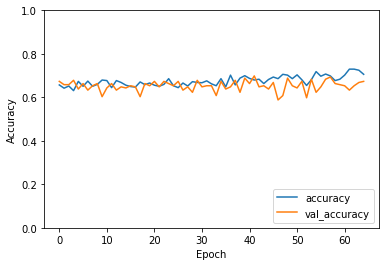

In [ ]:
history = size_histories['DR']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
R_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])

In [ ]:
size_histories['R'] = compile_and_fit(tiny_model, 'R/Dropout')

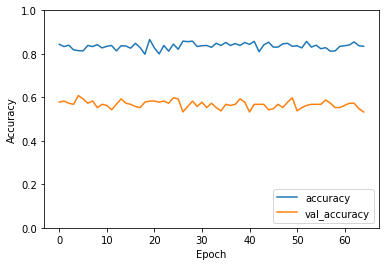

In [ ]:
history = size_histories['R']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {logdir}/sizes

In [ ]:
audio_file, _ = librosa.effects.trim(y)

In [ ]:
probability_model = tf.keras.Sequential([tiny_model, tf.keras.layers.Softmax()])

fs = sr  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('/content/gdrive/MyDrive/Machine Learning EHB 328E/output.wav', fs, myrecording)  # Save as WAV file 

y, sr = librosa.load('/content/gdrive/MyDrive/Machine Learning EHB 328E/output.wav')

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

predictions_single = probability_model.predict(img)
print(predictions_single)

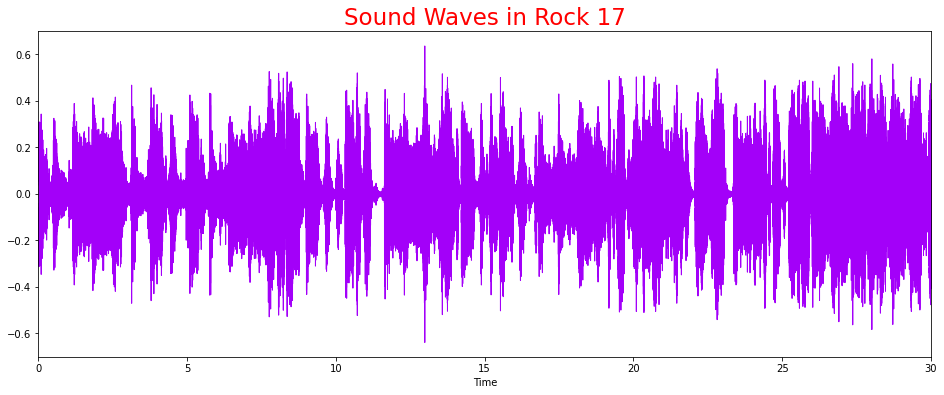

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Rock 17", fontsize = 23,color = 'r');

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

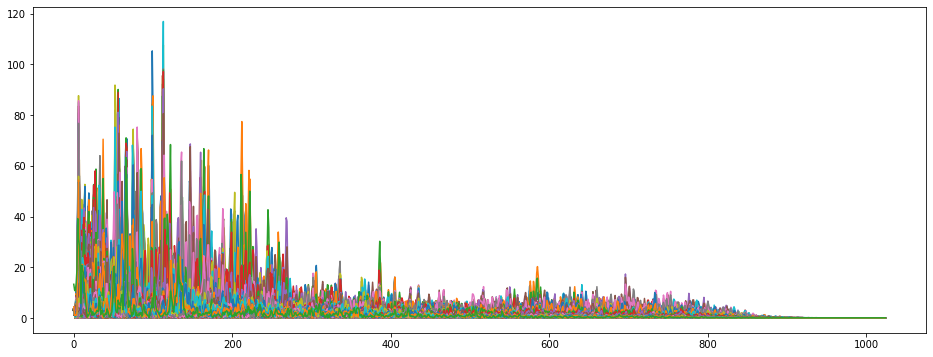

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

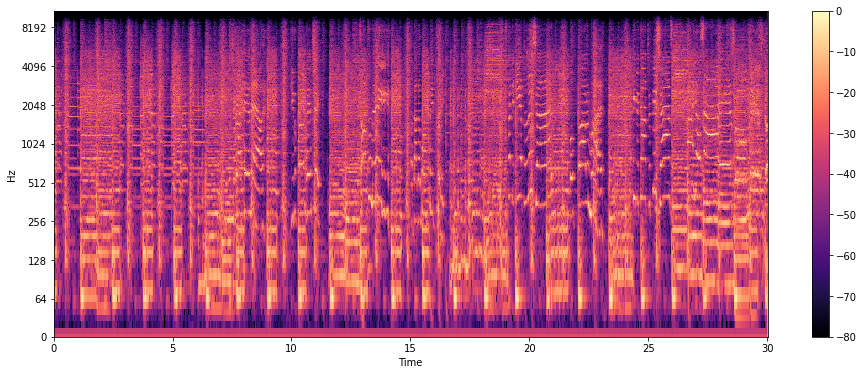

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log')
plt.colorbar();

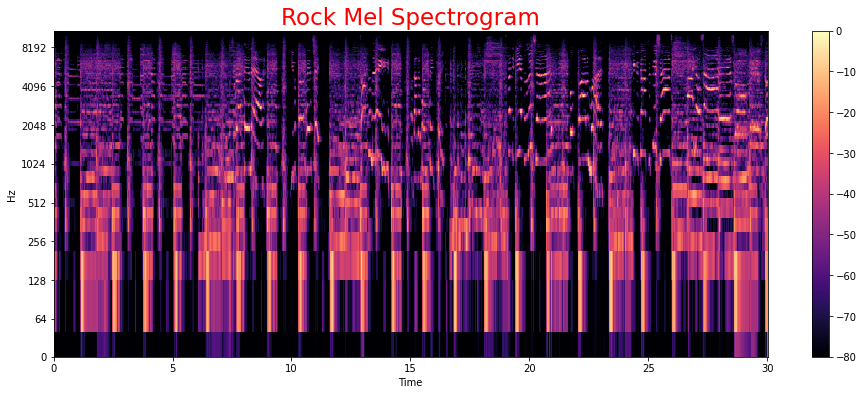

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log');
plt.colorbar();
plt.title("Rock Mel Spectrogram", fontsize = 23,color = 'r');

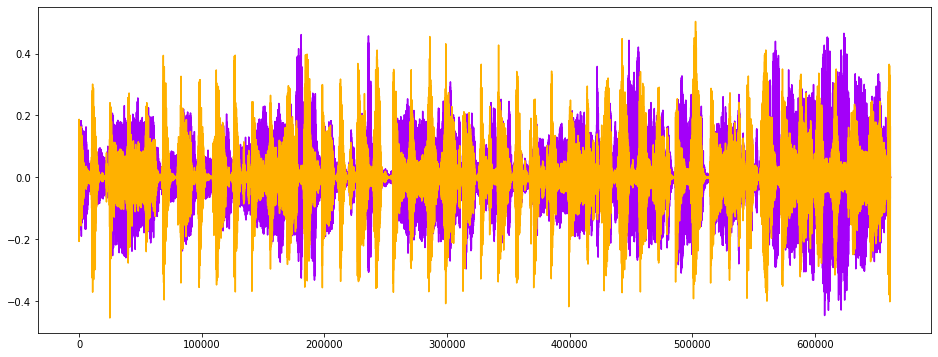

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100')